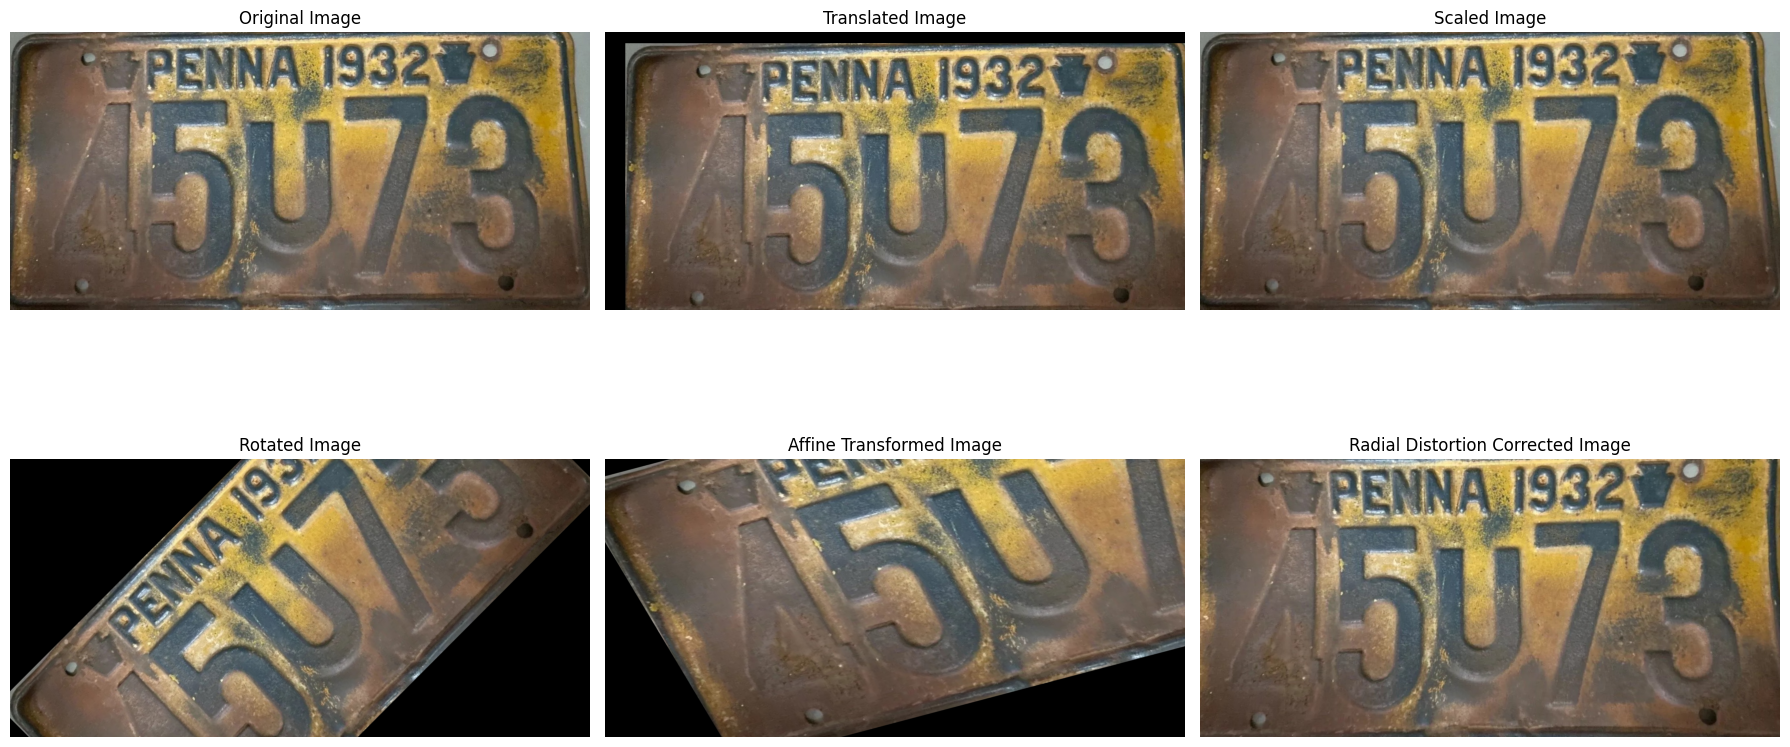

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Load the image
image_path = "s-l1600.jpg"
image = cv2.imread(image_path)

# Perform geometric transformations
def translate_image(image, x, y):
    # Create the translation matrix
    M = np.float32([[1, 0, x], [0, 1, y]])
    # Apply translation
    translated_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return translated_image

def scale_image(image, scale_factor):
    # Resize image based on scale factor
    scaled_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
    return scaled_image

def rotate_image(image, angle):
    # Get the center of the image
    center = (image.shape[1] // 2, image.shape[0] // 2)
    # Get the rotation matrix
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    # Perform the rotation
    rotated_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return rotated_image

def affine_transformation(image):
    rows, cols, _ = image.shape
    # Define 3 points for affine transform
    pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
    pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
    # Get the affine transform matrix
    M = cv2.getAffineTransform(pts1, pts2)
    # Apply the affine transformation
    affine_image = cv2.warpAffine(image, M, (cols, rows))
    return affine_image

def radial_distortion_correction(image):
    # Assume some made-up camera matrix and distortion coefficients
    K = np.array([[image.shape[1], 0, image.shape[1]//2],
                  [0, image.shape[0], image.shape[0]//2],
                  [0, 0, 1]], dtype=np.float32)
    # Distortion coefficients
    dist_coeffs = np.array([-0.2, 0.1, 0, 0, 0], dtype=np.float32)
    # Correct the image
    corrected_image = cv2.undistort(image, K, dist_coeffs)
    return corrected_image

# Apply all transformations
translated_image = translate_image(image, 50, 30)
scaled_image = scale_image(image, 1.2)
rotated_image = rotate_image(image, 45)
affine_image = affine_transformation(image)
corrected_image = radial_distortion_correction(image)

# Display the images
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Original
axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title("Original Image")

# Translated
axs[0, 1].imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title("Translated Image")

# Scaled
axs[0, 2].imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
axs[0, 2].set_title("Scaled Image")

# Rotated
axs[1, 0].imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title("Rotated Image")

# Affine Transformation
axs[1, 1].imshow(cv2.cvtColor(affine_image, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title("Affine Transformed Image")

# Radial Distortion Correction
axs[1, 2].imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
axs[1, 2].set_title("Radial Distortion Corrected Image")

# Hide axis
for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()


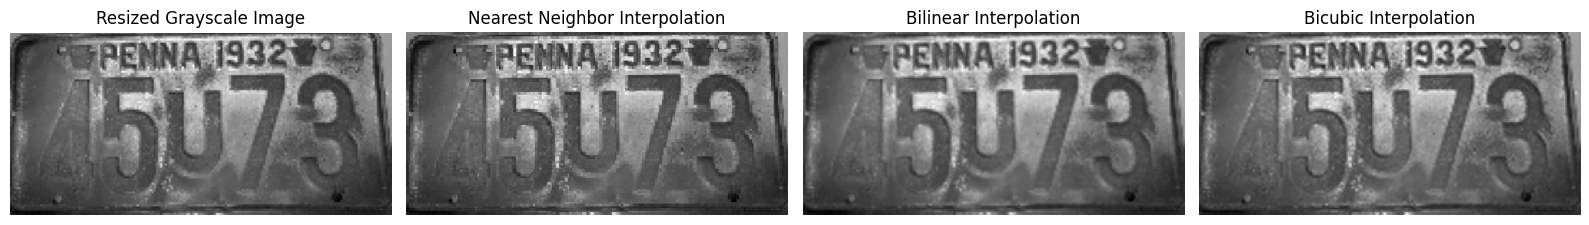

In [2]:
import cv2
import matplotlib.pyplot as plt


image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Interpolation methods for grayscale images
def nearest_neighbor(image, scale_factor):
    # Resize image using nearest-neighbor interpolation
    nearest_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_NEAREST)
    return nearest_image

def bilinear(image, scale_factor):
    # Resize image using bilinear interpolation
    bilinear_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
    return bilinear_image

def bicubic(image, scale_factor):
    # Resize image using bicubic interpolation
    bicubic_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)
    return bicubic_image

# Define the scale factor
scale_factor = 1.5

# Resize the original grayscale image to a smaller size for memory optimization
resized_gray_image = cv2.resize(gray_image, (gray_image.shape[1] // 8, gray_image.shape[0] // 8))

# Apply different interpolations with a scale factor to the resized grayscale image
nearest_image_gray = nearest_neighbor(resized_gray_image, scale_factor)
bilinear_image_gray = bilinear(resized_gray_image, scale_factor)
bicubic_image_gray = bicubic(resized_gray_image, scale_factor)

# Display the resized grayscale images with different interpolations
fig, axs = plt.subplots(1, 4, figsize=(16, 8))

# Original resized grayscale image
axs[0].imshow(resized_gray_image, cmap='gray')
axs[0].set_title("Resized Grayscale Image")

# Nearest Neighbor interpolation
axs[1].imshow(nearest_image_gray, cmap='gray')
axs[1].set_title("Nearest Neighbor Interpolation")

# Bilinear interpolation
axs[2].imshow(bilinear_image_gray, cmap='gray')
axs[2].set_title("Bilinear Interpolation")

# Bicubic interpolation
axs[3].imshow(bicubic_image_gray, cmap='gray')
axs[3].set_title("Bicubic Interpolation")

# Hide axis
for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()


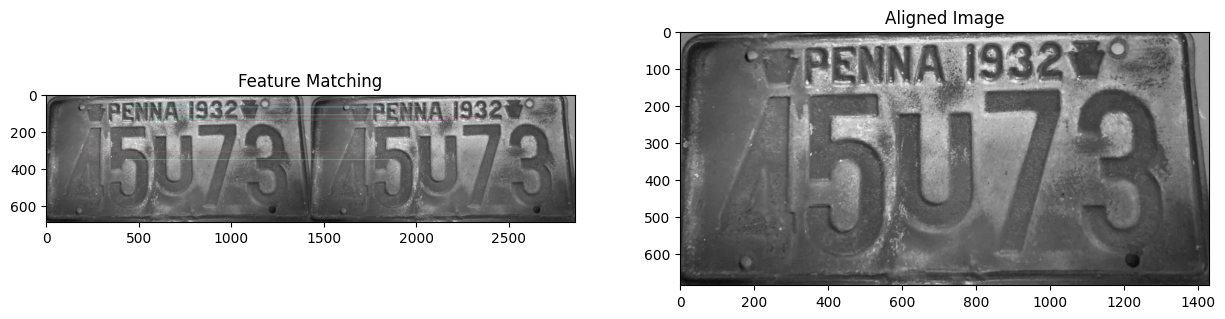

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the two images (assuming the user has two images for registration)
image1_path = "s-l1600.jpg"  # Reference image
image2_path = "s-l1600.jpg"  # Image to align (for example purposes, using the same image)

image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

# Initialize ORB detector
orb = cv2.ORB_create()

# Find keypoints and descriptors with ORB
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

# Match descriptors using BFMatcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

# Sort them in the order of their distance (lower distance is better)
matches = sorted(matches, key=lambda x: x.distance)

# Draw top 10 matches
img_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Find the homography matrix to align the two images
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Use homography to warp image2 to image1's perspective
height, width = image1.shape
aligned_image = cv2.warpPerspective(image2, H, (width, height))

# Display the results
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.title("Feature Matching")
plt.imshow(img_matches, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Aligned Image")
plt.imshow(aligned_image, cmap='gray')

plt.show()


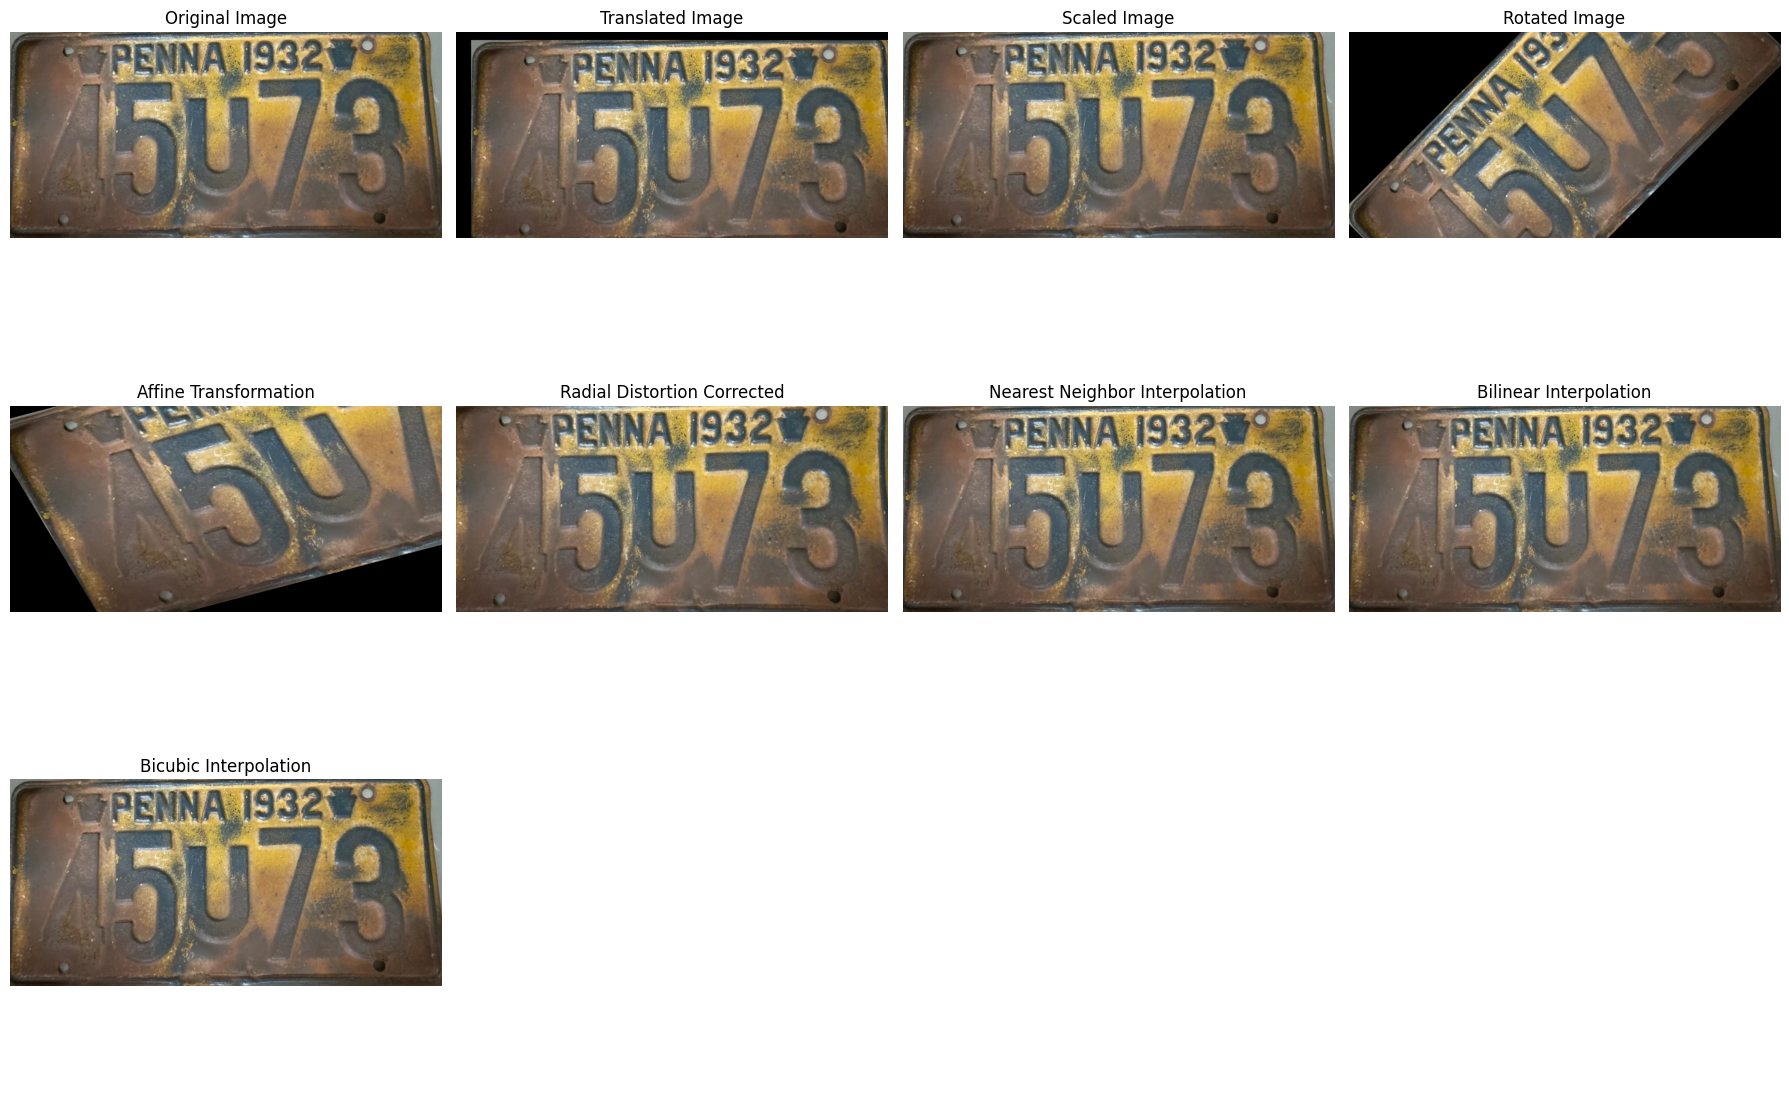

In [5]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image for transformations
image_path = "s-l1600.jpg"
image = cv2.imread(image_path)

# Geometric Transformation Functions
def translate_image(image, x, y):
    """Translate the image by x, y."""
    M = np.float32([[1, 0, x], [0, 1, y]])
    translated_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return translated_image

def scale_image(image, scale_factor):
    """Scale the image by the given scale factor."""
    scaled_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
    return scaled_image

def rotate_image(image, angle):
    """Rotate the image by the given angle."""
    center = (image.shape[1] // 2, image.shape[0] // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return rotated_image

def affine_transformation(image):
    """Perform affine transformation on the image."""
    rows, cols, _ = image.shape
    pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
    pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
    M = cv2.getAffineTransform(pts1, pts2)
    affine_image = cv2.warpAffine(image, M, (cols, rows))
    return affine_image

def radial_distortion_correction(image):
    """Correct radial distortion."""
    K = np.array([[image.shape[1], 0, image.shape[1]//2],
                  [0, image.shape[0], image.shape[0]//2],
                  [0, 0, 1]], dtype=np.float32)
    dist_coeffs = np.array([-0.2, 0.1, 0, 0, 0], dtype=np.float32)
    corrected_image = cv2.undistort(image, K, dist_coeffs)
    return corrected_image

# Interpolation Functions
def nearest_neighbor(image, scale_factor):
    """Resize the image using nearest-neighbor interpolation."""
    nearest_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_NEAREST)
    return nearest_image

def bilinear(image, scale_factor):
    """Resize the image using bilinear interpolation."""
    bilinear_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
    return bilinear_image

def bicubic(image, scale_factor):
    """Resize the image using bicubic interpolation."""
    bicubic_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)
    return bicubic_image

# Apply geometric transformations
translated_image = translate_image(image, 50, 30)
scaled_image = scale_image(image, 1.2)
rotated_image = rotate_image(image, 45)
affine_image = affine_transformation(image)
corrected_image = radial_distortion_correction(image)

# Apply interpolation techniques
nearest_image = nearest_neighbor(image, 1.5)
bilinear_image = bilinear(image, 1.5)
bicubic_image = bicubic(image, 1.5)

# Display the original and transformed images
fig, axs = plt.subplots(3, 4, figsize=(18, 12))

# Original Image
axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title("Original Image")

# Geometric Transformations
axs[0, 1].imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title("Translated Image")

axs[0, 2].imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
axs[0, 2].set_title("Scaled Image")

axs[0, 3].imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
axs[0, 3].set_title("Rotated Image")

axs[1, 0].imshow(cv2.cvtColor(affine_image, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title("Affine Transformation")

axs[1, 1].imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title("Radial Distortion Corrected")

# Interpolation Techniques
axs[1, 2].imshow(cv2.cvtColor(nearest_image, cv2.COLOR_BGR2RGB))
axs[1, 2].set_title("Nearest Neighbor Interpolation")

axs[1, 3].imshow(cv2.cvtColor(bilinear_image, cv2.COLOR_BGR2RGB))
axs[1, 3].set_title("Bilinear Interpolation")

axs[2, 0].imshow(cv2.cvtColor(bicubic_image, cv2.COLOR_BGR2RGB))
axs[2, 0].set_title("Bicubic Interpolation")

# Hide unused axes
for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()
